# **1. Perkenalan Dataset**


Dataset cuaca adalah kumpulan data berisi lebih dari 2500 data yang terdiri dari 6 fitur yaitu  Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure, dan Rain.

1. **Sumber Dataset**:  
   [Weather Forecast Dataset](https://www.kaggle.com/datasets/mikhail1681/walmart-sales)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Penjelasan Dataset**:  .
   - Store: Nomor ID Store
   - Date: Tanggal mulai minggu penjualan
   - Weekly_Sales: Penjualan
   - Holiday_Flag: Tanda ada atau tidaknya hari libur
   - Temperature: Suhu udara di wilayah tersebut
   - Fuel_Price: Biaya bahan bakar di wilayah tersebut
   - CPI: Consumer price index
   - Unemployment: Unemployment rate

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/harisman7/submission-akhir-bmlp/refs/heads/main/Walmart_Sales.csv")

print(df.head())
print(df.info())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Memahami struktur data
baris, kolom = df.shape  # Mendapatkan jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {baris} baris dan {kolom} kolom")

# Menampilkan statistik deskriptif dari dataset
print("\nStatistik deskriptif dataset:")
print(df.describe)

Jumlah baris dan kolom: 6435 baris dan 8 kolom

Statistik deskriptif dataset:
<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434    

In [4]:
# Mengidentifikasi jumlah data kosong
print("\nData kosong:\n", df.isnull().sum())


Data kosong:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [5]:
# Menampilkan nilai pada atribut bertipe data kategorikal
for col in df.select_dtypes(exclude=['number']).columns:
    print(f'{col.upper()}'.center(50, ' '))
    print(df[col].value_counts(), end='\n\n')

                       DATE                       
Date
05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: count, Length: 143, dtype: int64



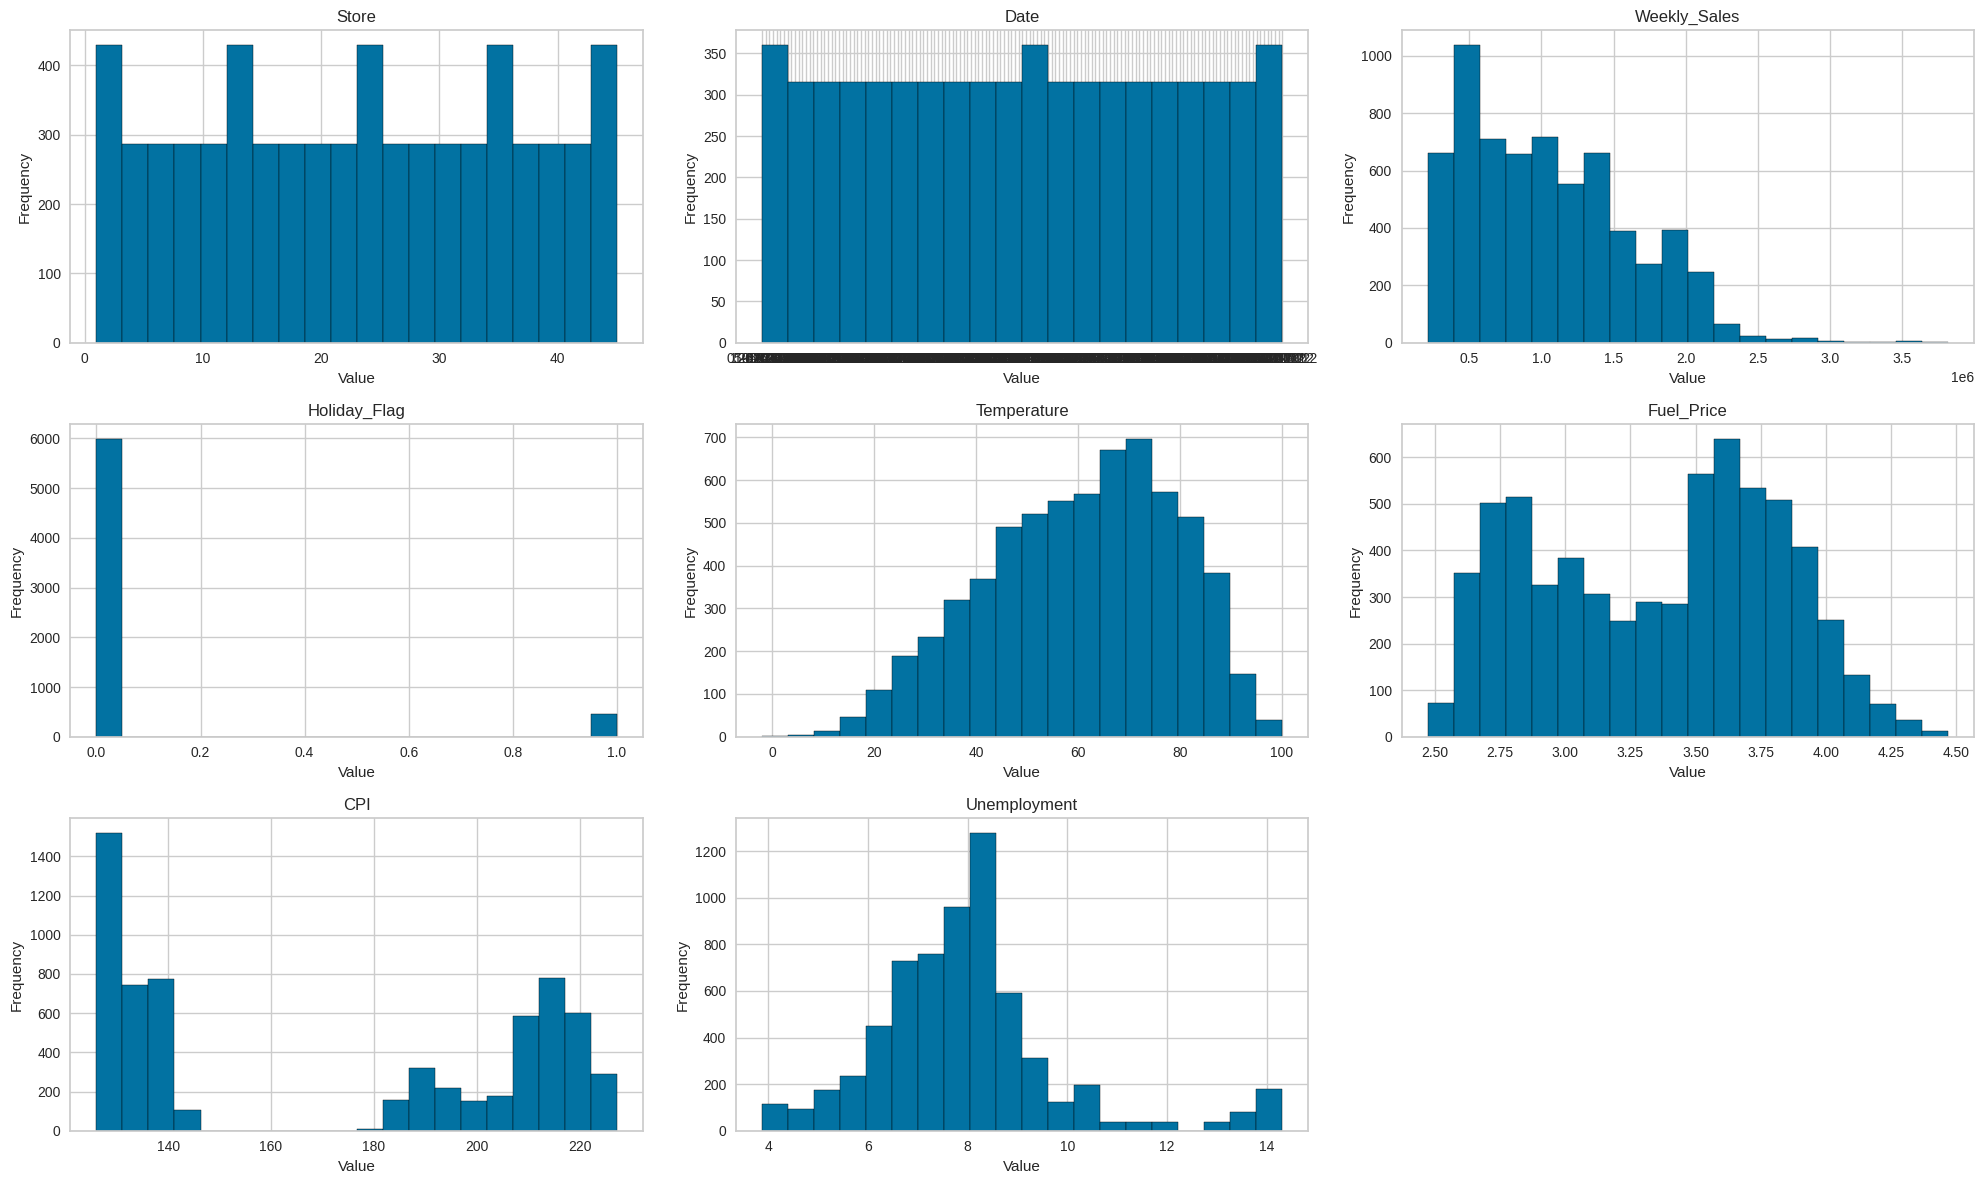

In [6]:
# Menghitung jumlah variabel
num_vars = len(df.columns)

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Mengubah axes menjadi array 1D
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
# Melihat kolom bertipe data kategorikal
print(df.select_dtypes(include=['object']))

            Date
0     05-02-2010
1     12-02-2010
2     19-02-2010
3     26-02-2010
4     05-03-2010
...          ...
6430  28-09-2012
6431  05-10-2012
6432  12-10-2012
6433  19-10-2012
6434  26-10-2012

[6435 rows x 1 columns]


In [8]:
# Konversi kolom 'Date' dari object ke datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Memisahkan day, month, dan year kedalam kolom yang terpisah sebagai integer
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Check the result
print(df)
print(df.dtypes)  # To verify the column type

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  day  month  year  


In [9]:
# Drop kolom 'Date' karena sudah tidak dipergunakan
df = df.drop(columns=['Date'])

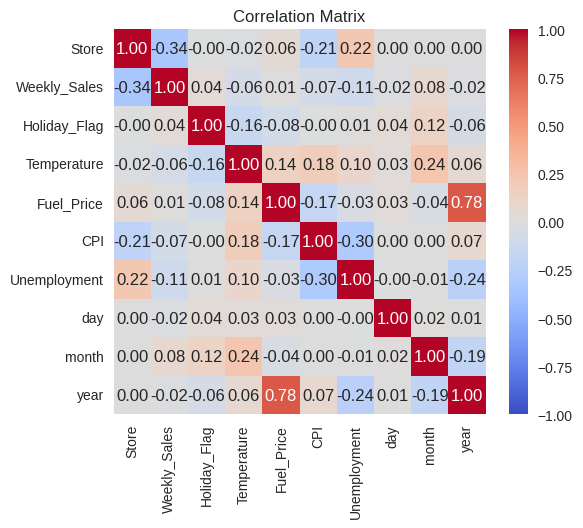

In [10]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

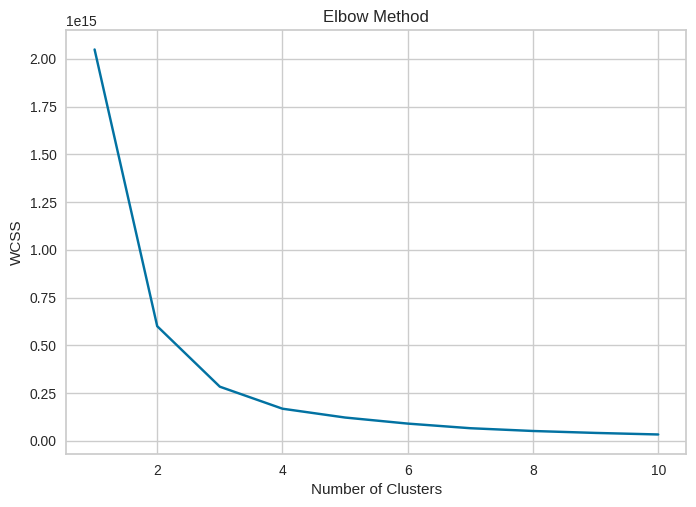

In [11]:
# Apply KMeans to the modified dataset
wcss = [KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df).inertia_ for i in range(1, 11)]

# Visualize the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

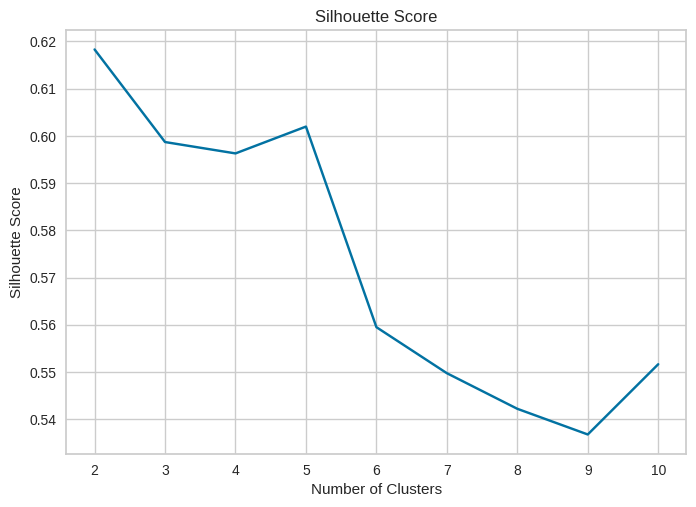

In [12]:
# Menggunakan Silhouette Score untuk mengevaluasi kualitas cluster
silhouette_scores = [silhouette_score(df, KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df).labels_) for i in range(2, 11)]

# Visualisasi Silhouette Score
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
# Memilih jumlah cluster yang optimal dan menambahkan label cluster ke dalam dataset
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

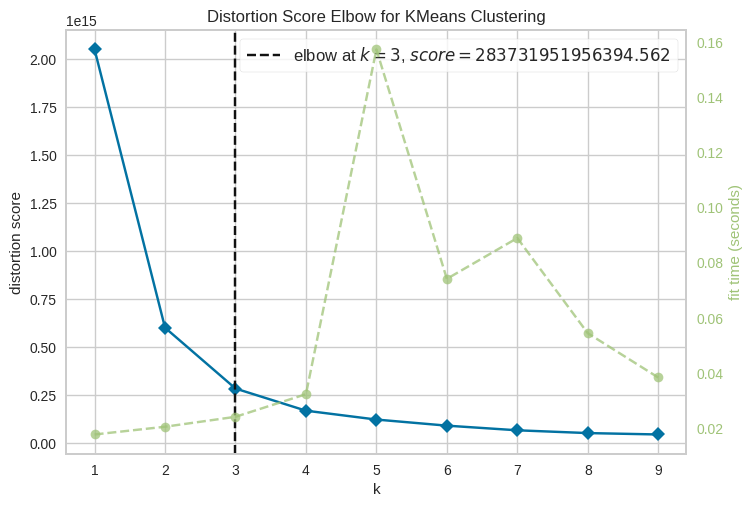

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Menggunakan visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit dan tampilkan grafik elbow
visualizer.fit(df)
visualizer.show()

In [15]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 5
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)

# Menampilkan hasil model KMeans
kmeans

KMeans(n_clusters=4, random_state=0)

In [16]:
# Menghitung dan menampilkan Silhouette Score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5963038274502667


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

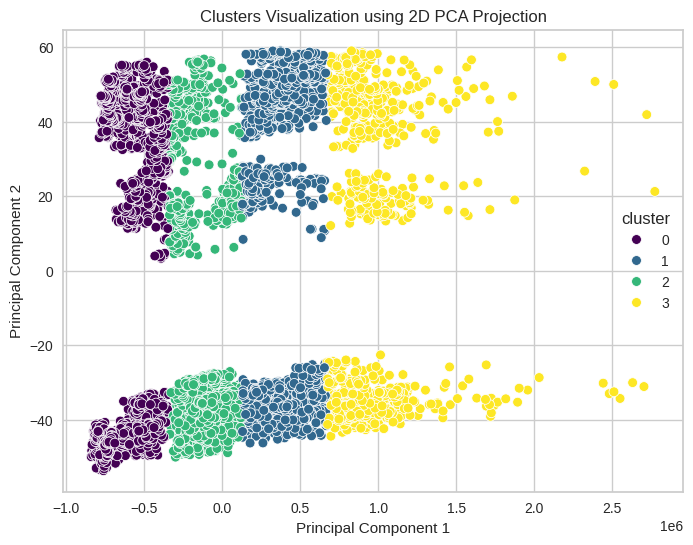

In [17]:
# Menggunakan PCA untuk reduksi dimensi ke 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Membuat DataFrame baru dengan hasil PCA dan menambahkan kolom cluster
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans.labels_

# Visualisasi hasil clustering dalam ruang 2D setelah PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Clusters Visualization using 2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [18]:
# Menyalin dataframe dan menambahkan kolom 'cluster' untuk label cluster
result_df = df.copy()
result_df['cluster'] = kmeans.labels_

# Menampilkan dataframe dengan label cluster
result_df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,Cluster,cluster
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,0,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,0,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,0,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,0,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,2,2
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012,2,2
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,2,2
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,2,2


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [19]:
# Mengelompokkan data berdasarkan cluster dan menganalisis rata-rata fitur untuk setiap cluster
cluster_summary = df.groupby('Cluster').mean()

# Menampilkan ringkasan rata-rata fitur per cluster
print("Summary of Average Features per Cluster:")
print(cluster_summary)

Summary of Average Features per Cluster:
             Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Cluster                                                                   
0        21.934954  1.409177e+06      0.068988    62.279468    3.386185   
1        25.960672  4.719421e+05      0.068051    63.222015    3.345198   
2        25.830678  9.385512e+05      0.063717    55.935658    3.363058   
3        12.657592  2.024715e+06      0.086911    60.418565    3.338527   

                CPI  Unemployment        day     month         year  
Cluster                                                              
0        177.837344      7.871189  15.445466  6.533509  2011.000000  
1        180.651769      8.114452  15.653999  6.324790  2010.985418  
2        157.155144      8.232927  15.912684  6.303245  2010.947493  
3        165.702204      7.514946  15.691099  6.857592  2010.892147  


Tulis hasil interpretasinya di sini.
1. Cluster 0: Cluster ini memiliki penjualan tertinggi (1.409.177) dan sangat dipengaruhi oleh Holiday_Flag (0.06899), menunjukkan bahwa toko-toko ini sukses saat liburan. Dengan suhu rata-rata 62.28°F, mereka berada di daerah dengan cuaca moderat, dan kondisi ekonomi (CPI 177.83, Unemployment 7.87%) tidak terlalu buruk. Penjualan tertinggi terjadi sekitar bulan Juni atau Juli.
2. Cluster 1: Penjualan di klaster ini lebih rendah (471.942) meskipun dipengaruhi oleh Holiday_Flag (0.06805). Suhu rata-rata 63.22°F menunjukkan daerah yang lebih hangat, tetapi dengan kondisi ekonomi yang lebih menantang (CPI 180.65, Unemployment 8.11%). Klaster ini cenderung aktif pada bulan Juni, namun dengan penjualan yang lebih moderat.
3. Cluster 2: Penjualan di klaster ini moderat (938.551) dengan suhu lebih dingin 55.94°F, mungkin cocok untuk produk musim dingin. Holiday_Flag yang lebih rendah (0.0637) dan kondisi ekonomi yang sedikit lebih buruk (CPI 157.16, Unemployment 8.23%) menyebabkan penjualan lebih moderat. Klaster ini lebih bergantung pada faktor lokal.
4. Cluster 3: Dengan penjualan tertinggi setelah Cluster 0 (2.024.715), klaster ini sangat dipengaruhi oleh Holiday_Flag (0.08691). Suhu 60.42°F menunjukkan wilayah dengan cuaca moderat. Toko di klaster ini beroperasi di wilayah dengan kondisi ekonomi yang lebih stabil (CPI 165.70, Unemployment 7.51%) dan aktif pada bulan Juli.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [20]:
result_df.to_csv('result_df.csv', index=False)

In [21]:
from google.colab import files
# Trigger file download in Google Colab
files.download('result_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>